In [33]:
%matplotlib inline
# import xarray as xr
# import numpy as np
# import scipy.interpolate as interp
import pandas as pd

import numpy as np
import scipy.stats as stats

import matplotlib.pyplot as plt

import xgboost
import sklearn.metrics as metrics
from sklearn.model_selection import train_test_split

In [34]:
df_roc_LR_resample_window = pd.read_csv('/home/colili/Documents/PhD/project_john/DataFrame_produced/df_compare_roc_LR_resample_window.csv')
df_roc_LR_resample = pd.read_csv('/home/colili/Documents/PhD/project_john/DataFrame_produced/df_compare_roc_LR_resample.csv')
df_roc_LR = pd.read_csv('/home/colili/Documents/PhD/project_john/DataFrame_produced/df_compare_roc_LR.csv')

df_roc_RF_resample_window = pd.read_csv('/home/colili/Documents/PhD/project_john/DataFrame_produced/df_compare_roc_rf_resample_window.csv')
df_roc_RF_resample = pd.read_csv('/home/colili/Documents/PhD/project_john/DataFrame_produced/df_compare_roc_RF_resample.csv')
df_roc_RF = pd.read_csv('/home/colili/Documents/PhD/project_john/DataFrame_produced/df_compare_roc_RF.csv')


df_roc_xgboost_resample_window = pd.read_csv('/home/colili/Documents/PhD/project_john/DataFrame_produced/df_compare_roc_xgboost_resample_window.csv')
df_roc_xgboost_resample = pd.read_csv('/home/colili/Documents/PhD/project_john/DataFrame_produced/df_compare_roc_xgboost_resample.csv')
df_roc_xgboost = pd.read_csv('/home/colili/Documents/PhD/project_john/DataFrame_produced/df_compare_roc_xgboost.csv')

In [7]:
df_roc_LR_resample_window.head()

,Unnamed: 0,true,predictions
0,0,1,1
1,1,1,1
2,2,0,0
3,3,1,0
4,4,1,0


In [38]:
df_roc_LR.columns

Index(['Unnamed: 0', 'true', 'predictions', 'prob'], dtype='object')

Text(0.5, 1.0, 'ROC of the different statistical model tried')

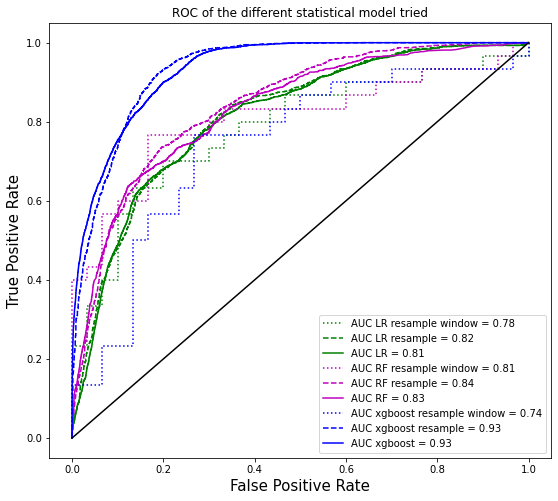

In [62]:
from sklearn.metrics import precision_score, recall_score, roc_auc_score, roc_curve

fig, ax = plt.subplots(figsize=(9, 8))

logit_roc_auc = roc_auc_score(df_roc_LR_resample_window.true, df_roc_LR_resample_window.probs)
y_test = df_roc_LR_resample_window.true
predictions = df_roc_LR_resample_window.probs
fpr, tpr, t = roc_curve(y_true=y_test, y_score=predictions)
ax.plot(fpr, tpr, 'g:', label='AUC LR resample window = %0.2f' % logit_roc_auc)

logit_roc_auc = roc_auc_score(df_roc_LR_resample.true, df_roc_LR_resample.probs)
y_test = df_roc_LR_resample.true
predictions = df_roc_LR_resample.probs
fpr, tpr, t = roc_curve(y_true=y_test, y_score=predictions)
ax.plot(fpr, tpr, 'g--', label='AUC LR resample = %0.2f' % logit_roc_auc)

logit_roc_auc = roc_auc_score(df_roc_LR.true, df_roc_LR.prob)
y_test = df_roc_LR.true
predictions = df_roc_LR.prob
fpr, tpr, t = roc_curve(y_true=y_test, y_score=predictions)
ax.plot(fpr, tpr, 'g-', label='AUC LR = %0.2f' % logit_roc_auc)

logit_roc_auc = roc_auc_score(df_roc_RF_resample_window.true, df_roc_RF_resample_window.probs)
y_test = df_roc_RF_resample_window.true
predictions = df_roc_RF_resample_window.probs
fpr, tpr, t = roc_curve(y_true=y_test, y_score=predictions)
ax.plot(fpr, tpr, 'm:', label='AUC RF resample window = %0.2f' % logit_roc_auc)

logit_roc_auc = roc_auc_score(df_roc_RF_resample.true, df_roc_RF_resample.probs)
y_test = df_roc_RF_resample.true
predictions = df_roc_RF_resample.probs
fpr, tpr, t = roc_curve(y_true=y_test, y_score=predictions)
ax.plot(fpr, tpr, 'm--', label='AUC RF resample = %0.2f' % logit_roc_auc)

logit_roc_auc = roc_auc_score(df_roc_RF.true, df_roc_RF.probs)
y_test = df_roc_RF.true
predictions = df_roc_RF.probs
fpr, tpr, t = roc_curve(y_true=y_test, y_score=predictions)
ax.plot(fpr, tpr, 'm-', label='AUC RF = %0.2f' % logit_roc_auc)

logit_roc_auc = roc_auc_score(df_roc_xgboost_resample_window.true, df_roc_xgboost_resample_window.predictions)
y_test = df_roc_xgboost_resample_window.true
predictions = df_roc_xgboost_resample_window.predictions
fpr, tpr, t = roc_curve(y_true=y_test, y_score=predictions)
ax.plot(fpr, tpr, 'b:', label='AUC xgboost resample window = %0.2f' % logit_roc_auc)

logit_roc_auc = roc_auc_score(df_roc_xgboost_resample.true, df_roc_xgboost_resample.predictions)
y_test = df_roc_xgboost_resample.true
predictions = df_roc_xgboost_resample.predictions
fpr, tpr, t = roc_curve(y_true=y_test, y_score=predictions)
ax.plot(fpr, tpr,'b--', label='AUC xgboost resample = %0.2f' % logit_roc_auc)

logit_roc_auc = roc_auc_score(df_roc_xgboost.true, df_roc_xgboost.predictions)
y_test = df_roc_xgboost.true
predictions = df_roc_xgboost.predictions
fpr, tpr, t = roc_curve(y_true=y_test, y_score=predictions)
ax.plot(fpr, tpr, 'b-', label='AUC xgboost = %0.2f' % logit_roc_auc)

# y_test = reduced.true
# predictions = reduced.predictions
# fpr, tpr, t = metrics.roc_curve(y_true=y_test, y_score=predictions)
# ax.plot(fpr, tpr)
ax.plot([0, 1], [0, 1], 'k-')

ax.set_ylabel('True Positive Rate', fontsize=15)
ax.set_xlabel('False Positive Rate', fontsize=15)
ax.legend(loc="lower right")
ax.set_title('ROC of the different statistical model tried')

# plt.savefig('home/colili/Documents/PhD/project_john/Figure/')

In [51]:
pwd

'/home/colili/Documents/PhD/project_john/Code/machine_learning/PCA_k_means'